In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pokemon = pd.read_csv(Path("data/Pokemon.csv"))

In [3]:
electrics = pokemon[(pokemon["Type 1"]=="Electric")|(pokemon["Type 2"]=="Electric")]

In [5]:
electrics.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
31,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False
88,81,Magnemite,Electric,Steel,325,25,35,70,95,55,45,1,False


In [17]:
status = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

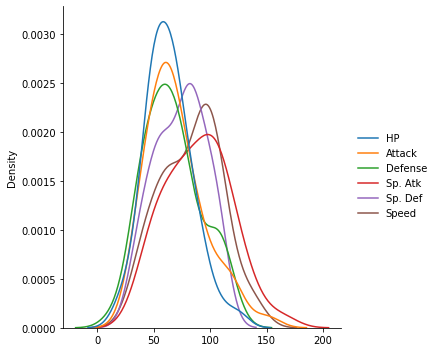

In [18]:
sns.displot(electrics[status], kind="kde")
plt.show()

In [19]:
print(electrics.HP.var())
print(electrics.HP.mean())

428.97959183673464
63.2


In [20]:
electrics[status].var()

HP         428.979592
Attack     662.662857
Defense    627.028980
Sp. Atk    845.916735
Sp. Def    497.242449
Speed      711.118776
dtype: float64

In [21]:
electrics[status].mean()

HP         63.20
Attack     69.52
Defense    66.54
Sp. Atk    88.96
Sp. Def    73.68
Speed      82.94
dtype: float64

In [48]:
n = 10000
data = dict()
for s in status:
    mu = electrics[s].mean()
    sigma = np.sqrt(electrics[s].var())
    data[s] = np.random.normal(mu, sigma, n)

In [49]:
dummy = pd.DataFrame(data)
dummy.head(3)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,101.758545,65.930075,84.373952,113.762351,52.535694,94.918609
1,68.944926,123.408997,64.506523,75.998136,46.504376,69.777710
2,85.291197,111.017374,87.794448,105.413667,47.611463,101.171283


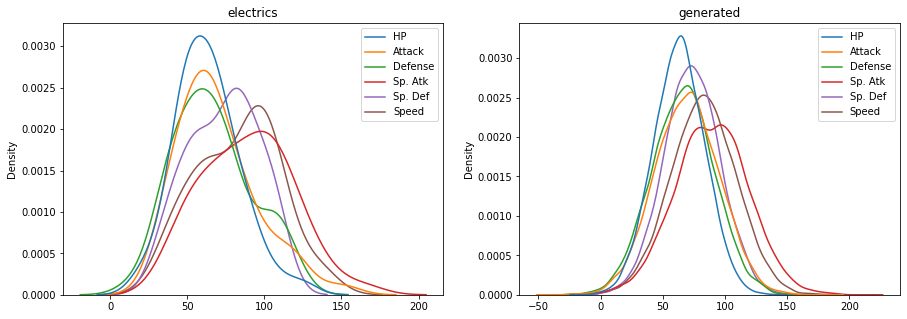

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.kdeplot(electrics[status], ax=ax[0])
ax[0].set_title("electrics")
sns.kdeplot(dummy, ax=ax[1])
ax[1].set_title("generated")
plt.show()